In [1]:
import os
import random
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
CLASSES = ["Defective", "Non-Defective"]

In [3]:
data_dir = Path("../data")
original_data_subdir = Path("Pepsico RnD Potato Lab Dataset")
preprocessed_data_subdir = Path("Preprocessed Dataset")
train_subdir = Path("Train")
test_subdir = Path("Test")

In [4]:
def display_image(image, grayscale=False):
    plt.figure()
    
    if grayscale:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(image)
    
    return

def preprocess_image(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    thresholded_image = cv2.inRange(image_hsv, (0, 0, 0, 0), (180, 255, 30, 0))
    dilated_image = cv2.dilate(thresholded_image, np.ones((5, 5), 'uint8'), iterations=30)

    return dilated_image

In [5]:
train_filepaths_defective = [data_dir / original_data_subdir /train_subdir / CLASSES[0] / file for file in os.listdir(data_dir / original_data_subdir / train_subdir / CLASSES[0])]
train_filepaths_nondefective = [data_dir / original_data_subdir /train_subdir / CLASSES[1] / file for file in os.listdir(data_dir / original_data_subdir / train_subdir / CLASSES[1])]
test_filepaths_defective = [data_dir / original_data_subdir / test_subdir / CLASSES[0] / file for file in os.listdir(data_dir / original_data_subdir / test_subdir / CLASSES[0])]
test_filepaths_nondefective = [data_dir / original_data_subdir / test_subdir / CLASSES[1] / file for file in os.listdir(data_dir / original_data_subdir / test_subdir / CLASSES[1])]

In [6]:
image = plt.imread(train_filepaths_defective[0])

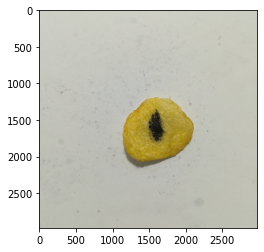

In [7]:
display_image(image)

In [8]:
preprocessed_image = preprocess_image(image)

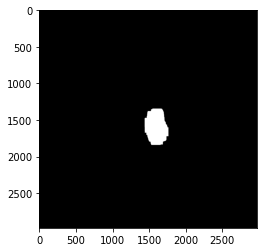

In [9]:
display_image(preprocessed_image, grayscale=True)

In [10]:
image = plt.imread(train_filepaths_nondefective[0])

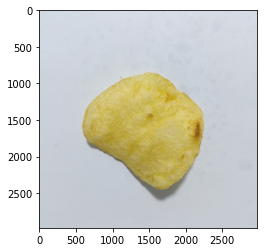

In [11]:
display_image(image)

In [12]:
preprocessed_image = preprocess_image(image)

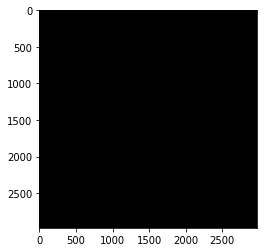

In [13]:
display_image(preprocessed_image, grayscale=True)

In [14]:
if not os.path.exists(data_dir / preprocessed_data_subdir):
    os.makedirs(data_dir / preprocessed_data_subdir)
    
for outer_dir in [train_subdir, test_subdir]:
    for inner_dir in CLASSES:
        path_to_create = os.path.join(data_dir, preprocessed_data_subdir, outer_dir, inner_dir)
        
        if not os.path.exists(path_to_create):
            os.makedirs(path_to_create)

In [15]:
for file_path in train_filepaths_defective:
    image = plt.imread(file_path)
    preprocessed_image = preprocess_image(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(data_dir / preprocessed_data_subdir / train_subdir / CLASSES[0] / file_name, preprocessed_image, cmap="gray")

In [16]:
for file_path in train_filepaths_nondefective:
    image = plt.imread(file_path)
    preprocessed_image = preprocess_image(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(data_dir / preprocessed_data_subdir / train_subdir / CLASSES[1] / file_name, preprocessed_image, cmap="gray")

In [17]:
for file_path in test_filepaths_defective:
    image = plt.imread(file_path)
    preprocessed_image = preprocess_image(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(data_dir / preprocessed_data_subdir / test_subdir / CLASSES[0] / file_name, preprocessed_image, cmap="gray")

In [18]:
for file_path in test_filepaths_nondefective:
    image = plt.imread(file_path)
    preprocessed_image = preprocess_image(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(data_dir / preprocessed_data_subdir / test_subdir / CLASSES[1] / file_name, preprocessed_image, cmap="gray")